In [1]:
from datetime import datetime
from elasticsearch import Elasticsearch
from pandas import DataFrame, Series
import pandas as pd

In [6]:
es = Elasticsearch(['localhost:9212'])

In [14]:
res = es.search(index='user_live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "lte": "now"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})

In [15]:
buckets = (res['aggregations']['days']['buckets'])

In [17]:
for element in buckets: 
        del element['key'] 

In [18]:
df = pd.DataFrame(buckets,columns=['key_as_string', 'doc_count'])
df.columns = ['date', 'doc_count']

In [19]:
print(df)

                                date  doc_count
0     Wed Jun 07 17:00:00 +0000 2017          1
1     Wed Jun 07 18:00:00 +0000 2017          0
2     Wed Jun 07 19:00:00 +0000 2017          0
3     Wed Jun 07 20:00:00 +0000 2017          0
4     Wed Jun 07 21:00:00 +0000 2017          0
5     Wed Jun 07 22:00:00 +0000 2017          0
6     Wed Jun 07 23:00:00 +0000 2017          0
7     Thu Jun 08 00:00:00 +0000 2017          0
8     Thu Jun 08 01:00:00 +0000 2017          0
9     Thu Jun 08 02:00:00 +0000 2017          0
10    Thu Jun 08 03:00:00 +0000 2017          0
11    Thu Jun 08 04:00:00 +0000 2017          0
12    Thu Jun 08 05:00:00 +0000 2017       4162
13    Thu Jun 08 06:00:00 +0000 2017      12300
14    Thu Jun 08 07:00:00 +0000 2017      16231
15    Thu Jun 08 08:00:00 +0000 2017       5962
16    Thu Jun 08 09:00:00 +0000 2017          0
17    Thu Jun 08 10:00:00 +0000 2017          0
18    Thu Jun 08 11:00:00 +0000 2017          0
19    Thu Jun 08 12:00:00 +0000 2017    

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [63]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


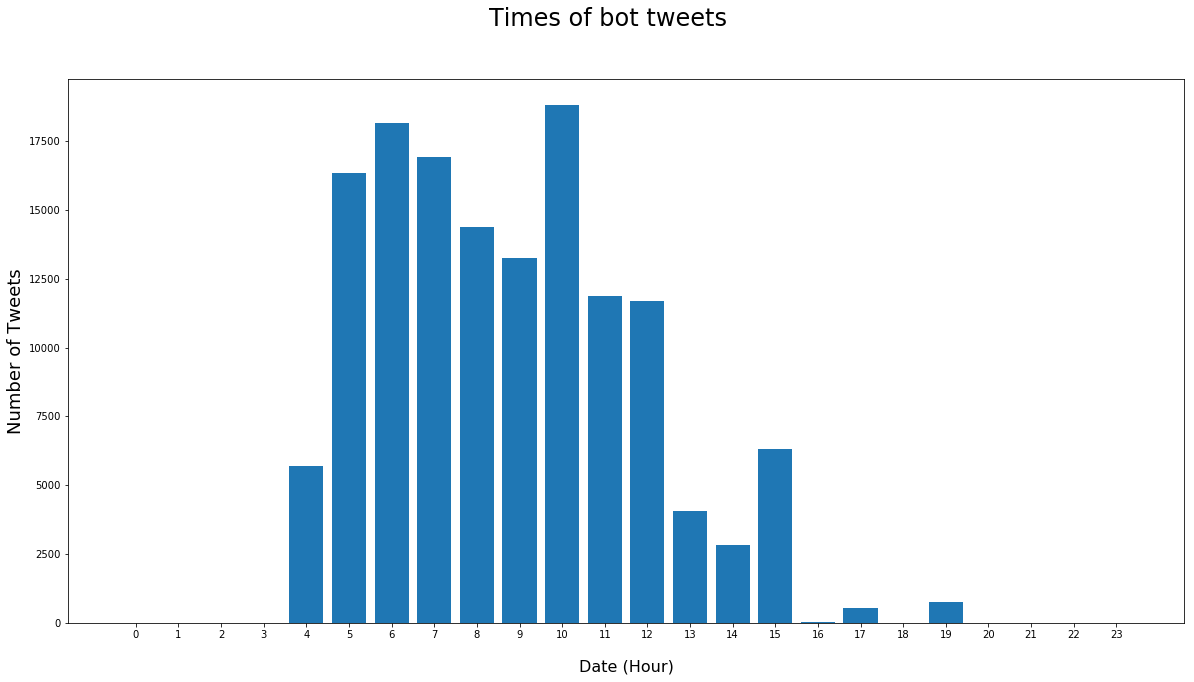

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
x = df['date'].dt.hour
ax.bar(df['date'].dt.hour, df["doc_count"])
plt.xticks(np.arange(min(x)+1, max(x)+1, 1.0))
plt.xlabel('Date (Hour)', fontsize = 16, labelpad=20)
plt.ylabel('Number of Tweets', fontsize='18')
plt.suptitle('Times of bot tweets', fontsize='24')


plt.show()